In [1]:
%matplotlib notebook
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 6]

N = 25 #ein Zustand z ist eine NxN Matrix
beta = 0.2 #inverse Temperatur

In [2]:
#Initialisation der Anfangsmatrix z
def createMatrix(N):
    return np.ones((N,N))
    #return (np.random.rand(N,N) < 0.5)*2-1

In [3]:
#Hamilton-Funktion H(z) = -\sum_{\{e,e'\}\in K} z(e)z(e')
def energy(z):
    """
    todo
    """
    return -(np.sum(z[0:N-1,:]*z[1:N,:])+np.sum(z[:,0:N-1]*z[:,1:N]))

In [4]:
#nicht normierte Verteilung \mu^\beta
def prob(z):
    return np.exp(-beta*energy(z))

In [5]:
#Übergangsmatrix Q mit q_{z,z'}=1/|E| falls z,z' sich nur um einen Eintrag unterscheiden
def proposal(z):
    zp = np.copy(z)
    zp[np.random.randint(0,N),np.random.randint(0,N)] *= -1
    return zp

In [6]:
#Akzeptanzwahrscheinlichkeit, Metropolis-Hastings
def prob_acc_MH(z_new, z_old, prob):
    return min(1, prob(z_new)/prob(z_old))

In [7]:
#Akzeptanzwahrscheinlichkeit, Gibbs-Sampler
def prob_acc_GS(z_new, z_old, prob):
    return prob(z_new)/(prob(z_new) + prob(z_old))

In [8]:
#Ein Schritt in dem MCMC-Algorithmus
def sample(z_old, prob):
    z_new = proposal(z_old)
    accept = np.random.random() < prob_acc_GS(z_new, z_old, prob)
    if accept:
        return z_new
    else:
        return z_old

In [9]:
def build_chain(init, n_total, prob):
    chain = [init]
    for _ in range(n_total):
        state = sample(chain[-1], prob)
        chain.append(state)
    
    return chain

In [10]:
# f(z) = Magnetisierung von z = 1/|E| * \sum_{e\in E} z(e)
def f(z):
    return np.sum(z)/(N*N)

In [11]:
z = createMatrix(N)
chain = build_chain(z, 100000, prob)

print("Last state of chain: ")
for i in range(-1,0):
    print("z=", chain[i], " with energy ", energy(chain[i]), " and magnetization ", f(chain[i]))

Last state of chain: 
z= [[ 1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1. -1.  1. -1. -1. -1. -1. -1.
  -1. -1.  1. -1. -1. -1. -1.]
 [ 1. -1.  1.  1. -1. -1. -1. -1. -1. -1.  1. -1.  1. -1.  1. -1. -1. -1.
  -1. -1. -1. -1.  1.  1. -1.]
 [ 1. -1.  1.  1.  1. -1.  1.  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.
  -1. -1. -1. -1. -1.  1.  1.]
 [-1. -1.  1.  1.  1.  1.  1. -1. -1.  1. -1. -1.  1.  1. -1.  1.  1. -1.
  -1. -1.  1.  1. -1. -1.  1.]
 [-1. -1. -1. -1.  1.  1.  1. -1. -1.  1. -1.  1.  1.  1.  1.  1.  1.  1.
  -1.  1.  1. -1.  1. -1.  1.]
 [-1.  1.  1. -1. -1.  1.  1. -1. -1.  1.  1.  1. -1. -1.  1.  1.  1.  1.
  -1. -1.  1. -1. -1. -1.  1.]
 [-1.  1. -1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.
   1. -1.  1.  1.  1. -1. -1.]
 [-1.  1. -1.  1.  1. -1. -1. -1. -1. -1.  1. -1.  1. -1. -1. -1. -1. -1.
   1. -1.  1.  1. -1.  1. -1.]
 [ 1.  1. -1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1.  1.  1. -1. -1. -1.
  -1. -1. -1. -1. -1.  1. -1.]
 [-1. -1.  1. -1.  1.  1.  1. 

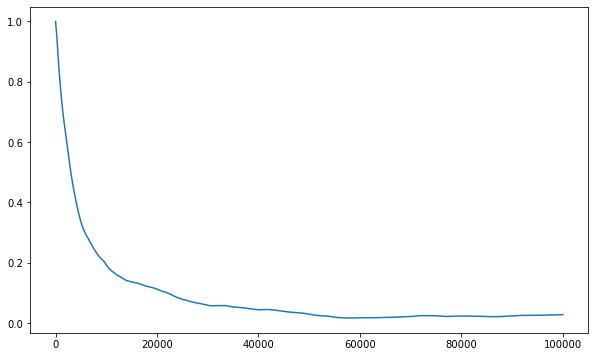

In [12]:
lim = 100000
E = np.zeros(lim)
E[0] = f(chain[0])
for i in range(1,lim):
    E[i] = 1/i * ((i-1)*E[i-1] + f(chain[i]))
xses = range(1,lim)
yses = [E[x] for x in xses]
#yses = [magnetisierung(chain[x]) for x in xses]
fig, ax = plt.subplots()
ax.plot(xses, yses)
plt.show()